In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Cargamos los datos
T = np.loadtxt('muestra.txt')
N = T.shape[0]

# Verosimilitud

In [3]:
# Definimos el modelo estadistico
def p(z,theta):
  return 0.5*(1+theta*z)

In [4]:
# Funcion de verosimilitud
def L(theta):
  return np.prod(0.5*(1+theta*T))

In [5]:
# -LN de la Funcion de verosimilitud
def NLL(theta):
  return -np.sum(np.log((0.5*(1+theta*T))))

In [6]:
# -LN de la Funcion de verosimilitud en un dato
def NLL_i(z, theta):
  return -np.log((0.5*(1+theta*z)))

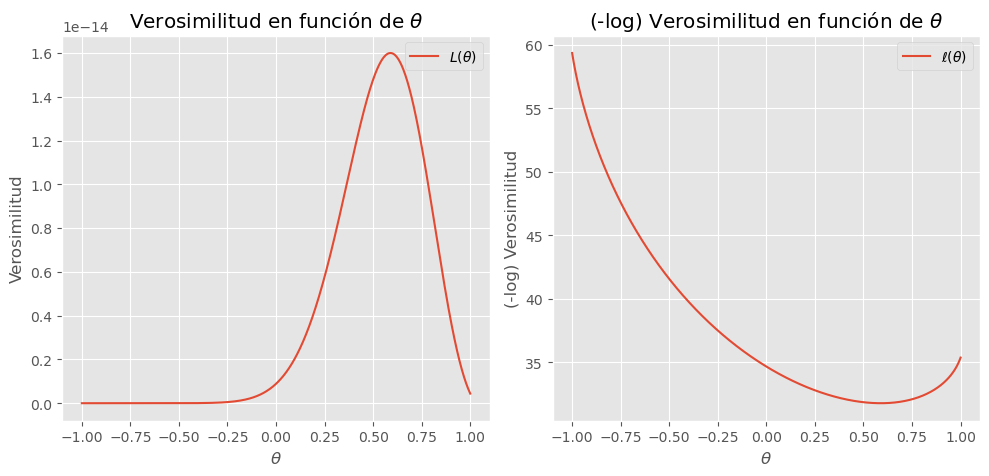

In [7]:
# Graficos

theta_range = np.linspace(-1,1,1000)

NLL_range = []
for i in range(len(theta_range)):
  NLL_range.append(NLL(theta_range[i]))

L_range = []
for i in range(len(theta_range)):
  L_range.append(L(theta_range[i]))

fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(theta_range, L_range, label=r'$L(\theta)$')
axes[0].set_title(r'Verosimilitud en función de $\theta$')
axes[0].set_xlabel(r'$\theta$')
axes[0].set_ylabel('Verosimilitud')
axes[0].legend()

axes[1].plot(theta_range, NLL_range, label=r'$\ell(\theta)$')
axes[1].set_title(r'(-log) Verosimilitud en función de $\theta$')
axes[1].set_xlabel(r'$\theta$')
axes[1].set_ylabel('(-log) Verosimilitud')
axes[1].legend()

plt.tight_layout()
plt.show()

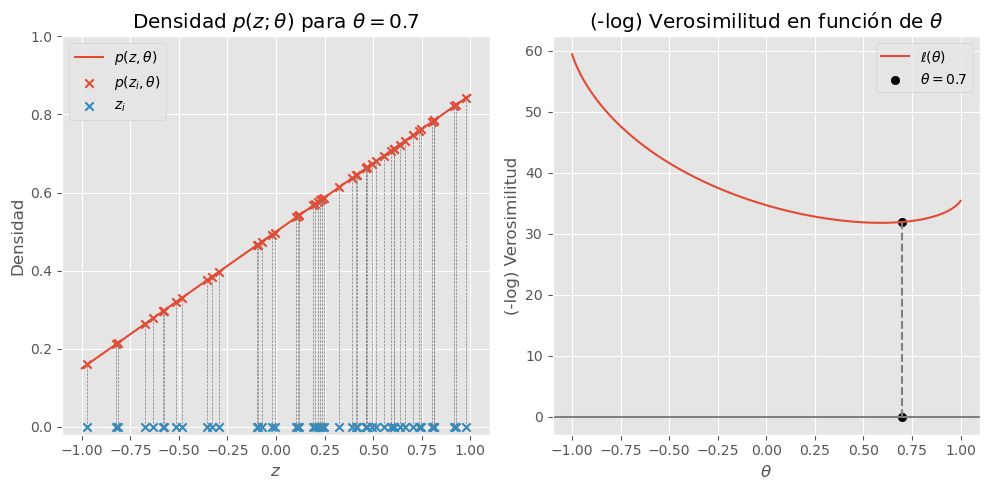

In [8]:
# Otro grafico

theta = 0.7
theta_range = np.linspace(-1,1,1000)

NLL_range = []
for i in range(len(theta_range)):
  NLL_range.append(NLL(theta_range[i]))

z_range = np.linspace(-1,1,100)

fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(z_range,p(z_range,theta), label=r'$p(z,\theta)$')
axes[0].set_ylim(-0.02,1)

for i in range(N):
  axes[0].plot([T[i],T[i]],[0,p(T[i],theta)],linestyle='dashed',color='gray', linewidth=0.5)

axes[0].scatter(T, p(T,theta), marker='x', label=r'$p(z_i,\theta)$')
axes[0].scatter(T, [0]*N, marker='x', label=r'$z_i$')
axes[0].set_title(r'Densidad $p(z;\theta)$ para $\theta=$'+str(theta))
axes[0].set_xlabel(r'$z$')
axes[0].set_ylabel('Densidad')
axes[0].legend()

axes[1].plot(theta_range, NLL_range, label=r'$\ell(\theta)$')
axes[1].plot([theta,theta],[0,NLL(theta)],linestyle='dashed',color='gray')
axes[1].scatter([theta,theta],[0,NLL(theta)], color='black', label=r'$\theta=$'+str(theta))
axes[1].axhline(y=0,color='gray')
axes[1].set_title(r'(-log) Verosimilitud en función de $\theta$')
axes[1].set_xlabel(r'$\theta$')
axes[1].set_ylabel('(-log) Verosimilitud')
axes[1].legend()

plt.tight_layout()
plt.show()

# Proportional Search


# Algoritmo Proportional Search

1. Inicializar `a` y `b` que encierren al mínimo de la función ℓ(θ)  
   Elegir proporción `ρ ∈ [0, 1/2]`  
   Elegir tolerancia `τ > 0`

2. Subdividir  
   `x ← a + ρ (b − a)`  
   `y ← b − ρ (b − a)`

3. Evaluar la función ℓ(x) y ℓ(y)

4. Si ℓ(x) < ℓ(y):  
   4.1 `θ̂ ← x`  
   4.2 Reasignamos las variables `a ← a`, `b ← y`

5. Si ℓ(x) ≥ ℓ(y):  
   5.1 `θ̂ ← y`  
   5.2 Reasignamos las variables `a ← x`, `b ← b`

6. Repetir desde 2. hasta que `|b − a| ≤ τ`.  
   Devolver `θ̂`

In [9]:
def proportional_search(f, a, b, tol=1e-5, rho=0.3):
  """
  Algoritmo de minimizacion Proportional Search.

  Parametros:
  - f: Funcion a minimizar.
  - a, b: Intervalo inicial [a, b].
  - tol: Tolerancia.
  - rho: Proporcion.

  Output:
  - x_opt: minimo estimado.
  - history_x: historia de x_opt.
  - history_f: historia de f(x_opt).
  """
  # Inicializamos x_opt arbitrariamente (promedio)
  x_opt = (a + b) / 2

  # Inicializamos las historias
  history_x = []
  history_f = []

  # Contador de iteraciones
  Iter = 0

  while abs(b - a) > tol:
    x = a + rho * (b - a)
    y = b - rho * (b - a)

    fx = f(x)
    fy = f(y)

    if fx < fy:
        b = y
        x_opt = x
    else:
        a = x
        x_opt = y

    history_x.append(x_opt)
    history_f.append(f(x_opt))

    print(f"Iteración: {Iter}")
    print("-------------")
    print(f"a: {a:.3f}, x: {x:.3f}, y: {y:.3f}, b: {b:.3f}")
    print(f"Optimo: {x if fx < fy else y:.3f}")
    print("-------------")

    if fx < fy:
        b = y
    else:
        a = x

    Iter += 1

  x_opt = (a + b) / 2

  return x_opt, history_x, history_f

In [10]:
theta_hat_PS, history_theta_PS, history_NLL_PS = proportional_search(NLL, -1, 1, 0.01, 0.3)

Iteración: 0
-------------
a: -0.400, x: -0.400, y: 0.400, b: 1.000
Optimo: 0.400
-------------
Iteración: 1
-------------
a: 0.020, x: 0.020, y: 0.580, b: 1.000
Optimo: 0.580
-------------
Iteración: 2
-------------
a: 0.314, x: 0.314, y: 0.706, b: 1.000
Optimo: 0.706
-------------
Iteración: 3
-------------
a: 0.314, x: 0.520, y: 0.794, b: 0.794
Optimo: 0.520
-------------
Iteración: 4
-------------
a: 0.458, x: 0.458, y: 0.650, b: 0.794
Optimo: 0.650
-------------
Iteración: 5
-------------
a: 0.458, x: 0.559, y: 0.693, b: 0.693
Optimo: 0.559
-------------
Iteración: 6
-------------
a: 0.529, x: 0.529, y: 0.623, b: 0.693
Optimo: 0.623
-------------
Iteración: 7
-------------
a: 0.529, x: 0.578, y: 0.644, b: 0.644
Optimo: 0.578
-------------
Iteración: 8
-------------
a: 0.563, x: 0.563, y: 0.609, b: 0.644
Optimo: 0.609
-------------
Iteración: 9
-------------
a: 0.563, x: 0.587, y: 0.620, b: 0.620
Optimo: 0.587
-------------
Iteración: 10
-------------
a: 0.563, x: 0.580, y: 0.603, 

In [11]:
print(f'El optimo estimado de theta es: {theta_hat_PS:.3f}')

El optimo estimado de theta es: 0.588


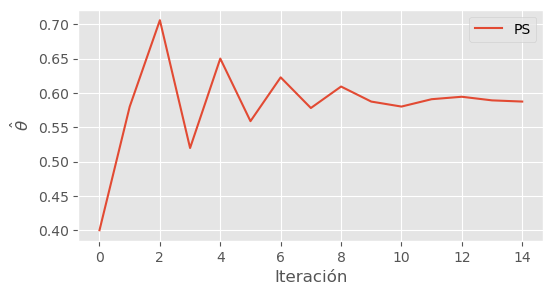

In [12]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_PS, label=r'PS')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

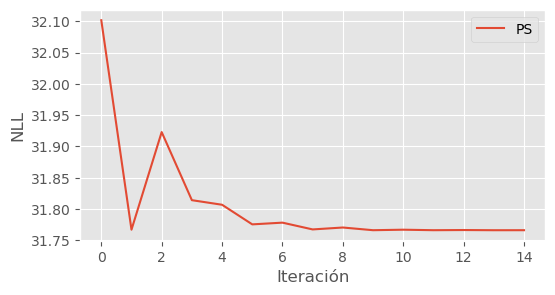

In [13]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_PS, label=r'PS')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()

# Descenso por gradiente

In [14]:
def derivada_NLL(theta):
  return -np.sum(T/(1+theta*T))

## Fórmula del Algoritmo

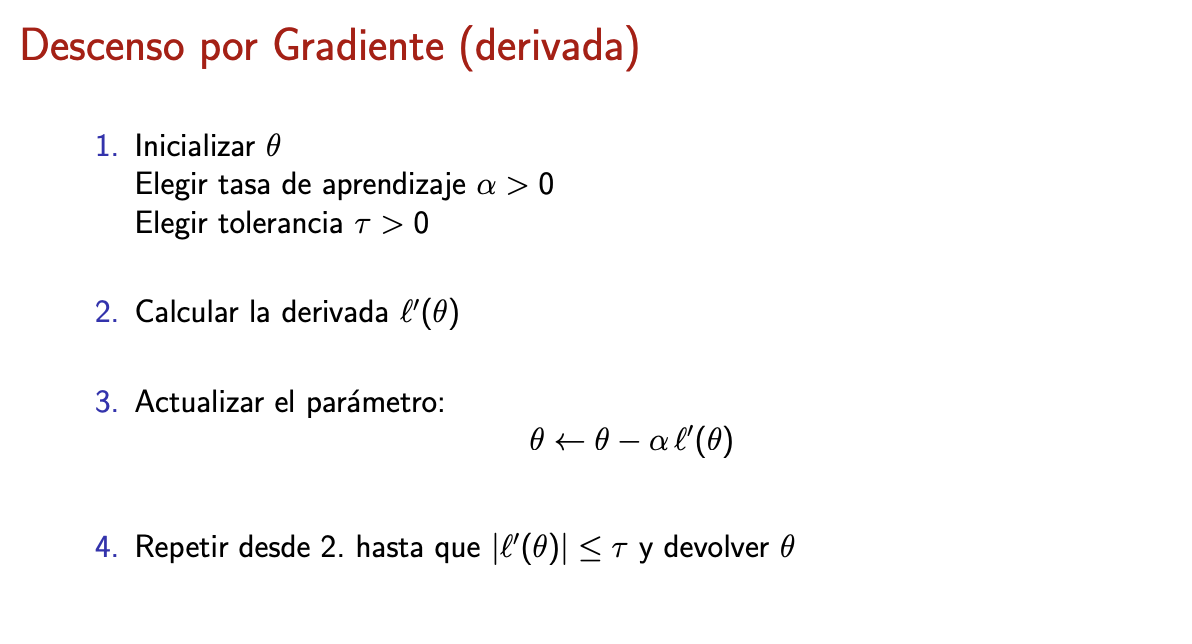

In [15]:
def gradient_descent(f, derivada_f, x0, lr=0.01, tol=1e-5, max_iter=1000):
  """
  Algoritmo de minimización Descenso por Gradiente.

  Parametros:
  - f: función a minimizar.
  - x0: estimación inicial.
  - lr: tasa de aprendizaje.
  - tol: tolerancia.
  - max_iter: número máximo de iteraciones.

  Output:
  - x_min: mínimo estimado.
  - history_x: historia de x_min.
  - history_f: historia de f(x_min).
  """
  # Inicializamos las historias
  history_x = []
  history_f = []

  # Contador de iteraciones
  Iter = 0

  # Inicializamos theta
  theta = x0

  # Paso pequeño para derivada numérica
  h = 1e-8

  for _ in range(max_iter):
      # Derivada numérica de f en x
      l_prima = derivada_f(theta)

      # Guardamos el historial
      history_x.append(theta)
      history_f.append(f(theta))

      # Condición de parada
      if abs(l_prima) <= tol:
          break

      # Actualizamos x con el gradiente
      theta = theta - lr * l_prima
      print('-------------')
      print('Iteración:' , Iter)
      print('x_min', theta)
      Iter += 1
  

  return theta, history_x, history_f

In [16]:
theta_hat_GD, history_theta_GD, history_NLL_GD = gradient_descent(NLL, derivada_NLL, 0, 0.001, 0.01, 1000)

-------------
Iteración: 0
x_min 0.0093374486641394
-------------
Iteración: 1
x_min 0.018533234799555574
-------------
Iteración: 2
x_min 0.027590176411021954
-------------
Iteración: 3
x_min 0.036510981499555936
-------------
Iteración: 4
x_min 0.04529825460187327
-------------
Iteración: 5
x_min 0.05395450285280491
-------------
Iteración: 6
x_min 0.062482141612821375
-------------
Iteración: 7
x_min 0.07088349969843005
-------------
Iteración: 8
x_min 0.07916082424935017
-------------
Iteración: 9
x_min 0.08731628526295845
-------------
Iteración: 10
x_min 0.09535197982347873
-------------
Iteración: 11
x_min 0.10326993605070892
-------------
Iteración: 12
x_min 0.11107211679069777
-------------
Iteración: 13
x_min 0.11876042306866279
-------------
Iteración: 14
x_min 0.12633669732254874
-------------
Iteración: 15
x_min 0.13380272643393562
-------------
Iteración: 16
x_min 0.14116024457149148
-------------
Iteración: 17
x_min 0.14841093586080803
-------------
Iteración: 18
x_min 0

In [17]:
print(f'El óptimo estimado de theta es: {theta_hat_GD:.3f}')

El óptimo estimado de theta es: 0.589


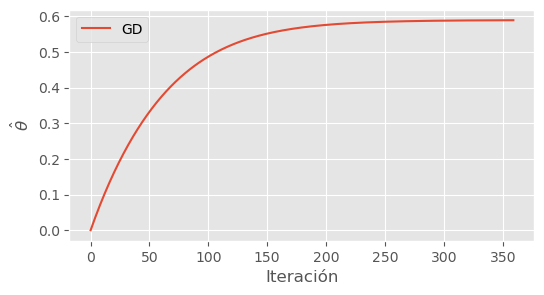

In [18]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_GD, label=r'GD')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

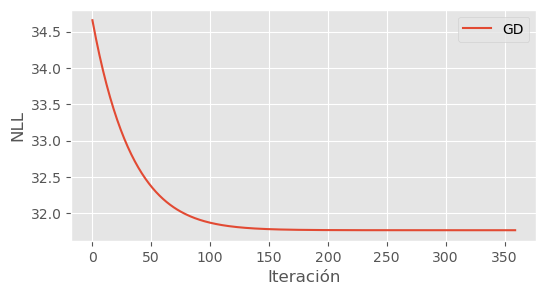

In [19]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_GD, label=r'GD')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()

# Descenso por Gradiente Estocástico

In [20]:
def derivada_NLL_i(z, theta):
  return -np.sum(z/(1+theta*z))

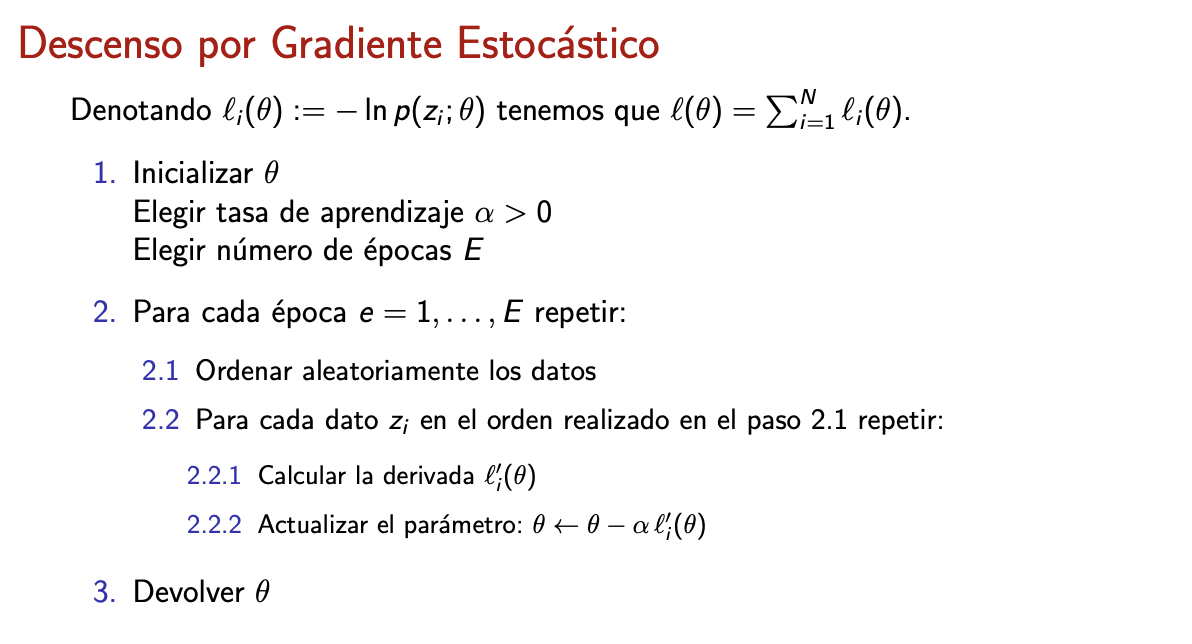

In [21]:
def stochastic_gradient_descent(f, derivada_f, x0, datos, lr=0.01, epochs=5):
  """
  Algoritmo Stochastic Gradient Descent (SGD).

  Parametros:
  - f: Función a minimizar.
  - x0: Estimación inicial
  - datos: datos disponibles.
  - lr: tasa de aprendizaje.
  - epochs: número de épocas.

  Output:
  - x_min: mínimo estimado.
  - history_x: historia de x_min.
  - history_f: historia de f(x_min).
  """
  # Inicializamos las historias
  history_x = []
  history_f = []

  # Inicializamos x
  x = x0

  # Contador de iteraciones
  Iter = 0

  for epoch in range(epochs):
        np.random.shuffle(datos)  # Orden aleatorio
        for z in datos:
            grad = derivada_f(z, x)
            x = x - lr * grad
            history_x.append(x)
            history_f.append(f(x))

  return x, history_x, history_f

In [22]:
theta_hat_SGD, history_theta_SGD, history_NLL_SGD = stochastic_gradient_descent(NLL,derivada_NLL_i, 0, T, 0.01, 20)

In [23]:
print(f'El óptimo estimado de theta es: {theta_hat_SGD:.3f}')

El óptimo estimado de theta es: 0.567


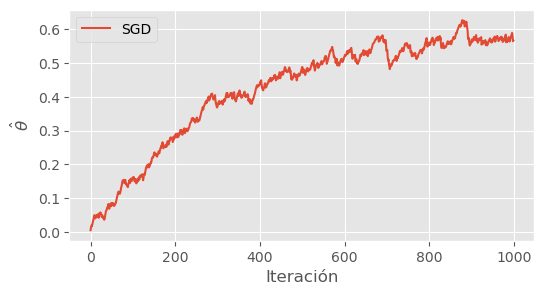

In [24]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_SGD, label=r'SGD')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

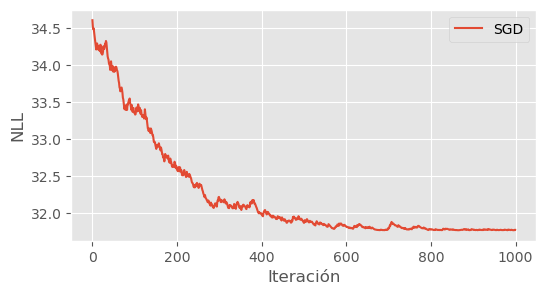

In [25]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_SGD, label=r'SGD')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()